# Assignmnet 1 (100 points)

**Name: Daniel Shaquille** <br>
**Email:  das9688@thi.de** <br>
**Group: B**  <br>
**Hours spend *(optional)* : More than 10 days** <br>

### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve. The usage of other python modules is not permitted.</p>

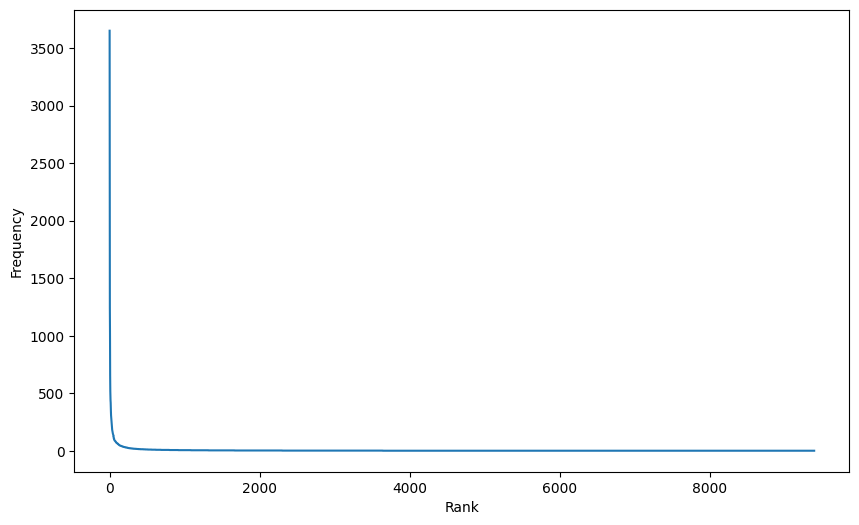

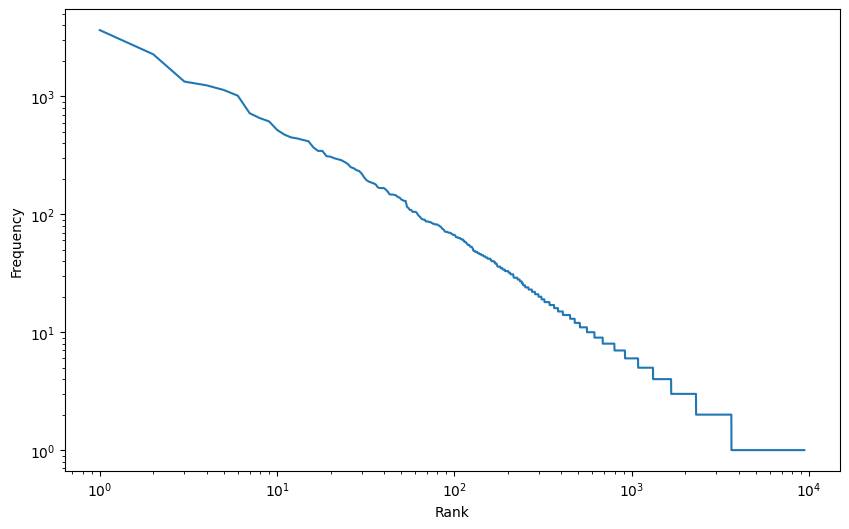

List of unique words sorted by their frequency in descending order:
the: 3650
and: 2278
of: 1336
to: 1242
a: 1134
he: 1014
in: 720
his: 654
that: 614
was: 520
i: 474
for: 449
is: 440
with: 427
as: 417
said: 370
on: 345
they: 345
at: 311
all: 308
but: 299
not: 293
had: 288
you: 278
it: 268
him: 251
up: 246
or: 237
have: 233
little: 221
when: 205
be: 194
by: 189
are: 186
out: 183
my: 179
will: 169
from: 167
were: 167
one: 167
would: 162
down: 156
their: 148
then: 147
we: 147
there: 146
this: 144
mowgli: 140
into: 139
very: 134
no: 132
who: 130
if: 130
could: 116
so: 113
where: 109
like: 109
big: 105
never: 105
do: 105
what: 104
any: 100
went: 97
can: 95
came: 92
go: 91
head: 90
come: 90
jungle: 87
has: 87
thou: 87
two: 86
been: 86
me: 85
your: 84
back: 83
shere: 83
project: 82
must: 82
them: 82
"i: 81
our: 80
than: 79
more: 78
only: 76
see: 75
an: 74
am: 72
over: 71
rikki-tikki: 71
off: 71
man: 70
till: 70
time: 70
toomai: 69
old: 69
about: 68
made: 67
knew: 67
know: 67
men: 66
sea: 64
h

In [1]:
import matplotlib.pyplot as plt

# Read the text corpus
with open("jungle_book.txt", "r") as file:
    text = file.read()

# Tokenize the text into individual words
words = text.split()

lowercase_words = []
for word in words:
    lowercase_words.append(word.lower())

# A function that counts the word frequencies
def word_count(word_lists):
    word_counts = {}
    for word in word_lists:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

x = word_count(lowercase_words)

# A function that sorts the words
def sort_function(word_list):
    return word_list[1]

frequency_words = list(x.items())
frequency_words.sort(key=sort_function, reverse=True)

word_sorting, frequencies = zip(*frequency_words)

# linear curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(frequencies) + 1), frequencies)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# log-log curve
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(frequencies) + 1), frequencies)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Print the list of unique words sorted by their frequency in descending order
print("List of unique words sorted by their frequency in descending order:")
for word, freq in frequency_words:
    print(f"{word}: {freq}")


### Question 2: Mutual Information *(30 points)*

<p>Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. </p>

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. If needed, you can use nltk library. </p>

In [2]:
import nltk
import math
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Read the contents of the text file
with open("jungle_book.txt", "r", encoding="utf-8") as file:
    corpus = file.read()


# Find all words in the text and remove all punctuations and non-alphabetic words
def word_search(text):
    words = []
    word = ''
    iword = False
    for c in text:
        if c.isalpha():
            word += c
            iword = True
        elif iword:
            words.append(word)
            word = ''  # Here we reset the word
            iword = False
    if word:
        words.append(word)
    return words

words = word_search(corpus)

words = [word.lower() for word in words]

# Here we are tokenizing the words in our list
words = word_tokenize(" ".join(words))


# Next we count the frequencies for the words in our text
freq = {}
for word in words:
    freq[word] = freq.get(word, 0) + 1

# Then we calculate the frequencies for the paired words in our text
paired_words = []
for i in range(len(words)-1):
    pair = (words[i], words[i+1])
    paired_words.append(pair)


# Then we use calculate PMI values for every words
pmi_value = {}
total_number_of_words = len(words)
for p in set(paired_words):
    w1, w2 = p
    pair_frequencies = paired_words.count(p)
    if freq[w1] >= 10 and freq[w2] >= 10:
        pmi = math.log((pair_frequencies * total_number_of_words) / (freq[w1] * freq[w2]))
        pmi_value[p] = pmi

        
# Listing the 30 highest and lowest PMI value for the word pairs 

def sort_pmi(item):
    return item[1]

pmi_sort = sorted(pmi_value.items(), key=sort_pmi, reverse=True)
highest_30 = pmi_sort[:30]
lowest_30 = pmi_sort[-30:]

print("Highest 30:")
for p, pmi_value in highest_30:
    print(f" The paired words: {p}, The PMI value: {pmi_value}")

print("\n")

print("Lowest 30:")
for p, pmi_value in lowest_30:
    print(f" The paired words: {p}, The PMI value: {pmi_value}")



Highest 30:
 The paired words: ('machua', 'appa'), The PMI value: 8.546734341251318
 The paired words: ('united', 'states'), The PMI value: 8.30557228443443
 The paired words: ('literary', 'archive'), The PMI value: 8.236579412947478
 The paired words: ('cold', 'lairs'), The PMI value: 7.6975829122147905
 The paired words: ('archive', 'foundation'), The PMI value: 7.582652945540813
 The paired words: ('paragraph', 'f'), The PMI value: 7.535133429572837
 The paired words: ('bandar', 'log'), The PMI value: 7.418269089433526
 The paired words: ('petersen', 'sahib'), The PMI value: 7.3892815525602735
 The paired words: ('stretched', 'myself'), The PMI value: 7.342761536925381
 The paired words: ('hind', 'legs'), The PMI value: 7.23805058283635
 The paired words: ('fore', 'paws'), The PMI value: 7.160439980131426
 The paired words: ('hind', 'flippers'), The PMI value: 7.137967124279368
 The paired words: ('tree', 'tops'), The PMI value: 7.032606608621542
 The paired words: ('troop', 'horse'

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements. Finally, compare the performance of the language model with and without Backoff.</p>

<p> You cannot use any Python libraries like NLTK. If you need to use special Python modules, you can discuss with your instructor before submission. </p>

<h4> Datasets and Resources </h4> 

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [3]:
import math
import random


'''Convert our corpus to an ngram'''
def ngram_choice(words, n=2):
    grams = []
    for i in range(len(words) - n + 1):
        grams.append(words[i:i+n])
    return grams

'''Get the word frequency'''
def word_freq(words):
    frequency_dict = {}
    for word in words:
        if word in frequency_dict:
            frequency_dict[word] += 1
        else:
            frequency_dict[word] = 1
    return frequency_dict


'''Get the ngram frequency'''
def ngram_freq(words, n=2):
    frequency_dict = {}
    grams = ngram_choice(words, n)
    for gram in grams:
        x = str(gram)
        if x in frequency_dict:
            frequency_dict[x][1] += 1
        else:
            frequency_dict[x] = [gram, 1]
    return frequency_dict




'''Calculate the probability of our ngram '''
def ngram_prob(ngram, train_words, word_map, ngram_map, n, backoff):
    p = []

    if ngram[0] not in word_map:
        return [0]

    ngram_w = str(ngram)
    if ngram_w not in ngram_map and backoff and n > 1:
        n3 = n - 1
        ngram2 = ngram_choice(ngram, n3)
        new_n_mapping = ngram_freq(train_words, n3)
        for ngram1 in ngram2:
            proba = [0]
            while proba[0] == 0 and n3 > 0:
                proba = ngram_prob(ngram1, train_words, word_map, new_n_mapping, n3, backoff)
                n3 -= 1
            p += proba
    elif ngram_w in ngram_map:
        count = ngram_map[ngram_w][1]
        word_count = word_map[ngram[0]]
        p.append(count / word_count)

    return p or [0]



"""Calculate our perplexity"""
def model_perplexity(words, train_words, word_map, ngram_map, n, backoff):
    
    total_log_probability = 0
    grams = ngram_choice(words, n)

    for gram in grams:
        ngram_probability = ngram_prob(gram, train_words, word_map, ngram_map, n, backoff)
        for probability in ngram_probability:
            total_log_probability += math.log2(probability + 1e-10)

    return 2 ** -(total_log_probability / len(words))


In [4]:

cleaning = ["", "="]

def fetch_file(file):
    # splitting words
    words = file.read().split()
    # Filter noisy words
    words = [word for word in words if word not in cleaning]
    return words

def open_file(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        return fetch_file(file)

train_words = open_file('wiki.train.raw')
test_words = open_file('wiki.test.raw')[:2000]
valid_words = open_file('wiki.valid.raw')[:2000]

word_map = word_freq(train_words)
bigram_map = ngram_freq(train_words, 2)


'''Pick a random word'''
def word_choice(words):
    word_length = random.randint(20, 150)
    word_pos = random.randint(0, len(words) - word_length)
    return words[word_pos : word_pos + word_length]


'''Calcuate the Perplexity'''
def evaluate_model(random_words, backoff=False):
    return model_perplexity(random_words, train_words, word_map, bigram_map, 2, backoff)


'''Generate Words'''
train_corpus = word_choice(train_words)
val_corpus = word_choice(valid_words)
test_corpus = word_choice(test_words)







<h1>Without Backoff</h1>

In [5]:
print("Model Without Using Backoff:")

perplexity_train = evaluate_model(train_corpus)
perplexity_test = evaluate_model(test_corpus)
perplexity_valid = evaluate_model(val_corpus)


print(f"Train Perplexity without using backoff: {perplexity_train}")
print(f"Test Perplexity without using backoff: {perplexity_test}")
print(f"Valid Perplexity without using backoff: {perplexity_valid}")



Model Without Using Backoff:
Train Perplexity without using backoff: 97.97215886261911
Test Perplexity without using backoff: 35447.698313780995
Valid Perplexity without using backoff: 5664.005652434852


<h1>Backoff</h1>

In [6]:

# Evaluate and print results with backoff
print("Model Using Backoff:")

backoff_perplexity_train = evaluate_model(train_corpus, backoff=True)
backoff_perplexity_test = evaluate_model(test_corpus, backoff=True)
backoff_perplexity_valid = evaluate_model(val_corpus, backoff=True)



print(f"Train Perplexity with backoff: {backoff_perplexity_train}")
print(f"Test Perplexity with backoff: {backoff_perplexity_test}")
print(f"Valid Perplexity with backoff: {backoff_perplexity_valid}")



Model Using Backoff:
Train Perplexity with backoff: 97.97215886261911
Test Perplexity with backoff: 35447.69831263189
Valid Perplexity with backoff: 5664.005652312557


In [7]:
'''Source Code'''
# First we preprocess our corpus by cleaning unimportant punctuations
# We then convert our text into a sequence of bigram
# We then count our words and bigram frequencies
# We then calculate the probabilty of our bigrams for our perplexity that we have and if we turn on our backoff, we backoff to the unigram if we have zero evidence in our bigram
# Then we evaluate by calculating the perplexity of our sequences of words from our model in the train, test and valid 



'''Non-Backoff vs Backoff'''
# Overall, the model with backoff shows a better performance compared to the model without backoff even tough it is not that significant.
# It could handle rare words and also unseen words using a unigram model when we use the backoff
# Backoff is really useful to improve our model

'''
Potential Improvements
'''
# we could use trigrams instead of bigrams
# We could even use greater N’s for Ngrams for further improvements.
# Using the NLTK python library will give us a higher accuracy
# We should preprocess our text properly by removing all meaningless parts so that we will reduce noise when our model is learning.







'\nPotential Improvements\n'

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*

In [8]:

from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer

text = "Hello, we are going for a trip to another city tomorrow."

tokens = word_tokenize(text)

print(tokens)

tokens = word_tokenize(text)
tagged_tokens = pos_tag(tokens)

print(tagged_tokens)

tokens = word_tokenize(text)
tagged_tokens = pos_tag(tokens)
ne_chunked_tokens = ne_chunk(tagged_tokens)

print(ne_chunked_tokens)

['Hello', ',', 'we', 'are', 'going', 'for', 'a', 'trip', 'to', 'another', 'city', 'tomorrow', '.']
[('Hello', 'NNP'), (',', ','), ('we', 'PRP'), ('are', 'VBP'), ('going', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('trip', 'NN'), ('to', 'TO'), ('another', 'DT'), ('city', 'NN'), ('tomorrow', 'NN'), ('.', '.')]
(S
  (GPE Hello/NNP)
  ,/,
  we/PRP
  are/VBP
  going/VBG
  for/IN
  a/DT
  trip/NN
  to/TO
  another/DT
  city/NN
  tomorrow/NN
  ./.)


In [9]:
analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(text)

print(scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [10]:
from nltk.stem import PorterStemmer

# Stemming
words = word_tokenize(text)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)

['hello', ',', 'we', 'are', 'go', 'for', 'a', 'trip', 'to', 'anoth', 'citi', 'tomorrow', '.']
